In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Importing the data 

In [2]:
cars_df = pd.read_csv('data/OLX_Car_Data_CSV.csv', encoding='latin1')

In [3]:
cars_df.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             22836 non-null  object 
 1   Condition         22837 non-null  object 
 2   Fuel              22528 non-null  object 
 3   KMs Driven        22687 non-null  float64
 4   Model             22525 non-null  object 
 5   Price             24973 non-null  int64  
 6   Registered City   20337 non-null  object 
 7   Transaction Type  22528 non-null  object 
 8   Year              22689 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='Brand'>

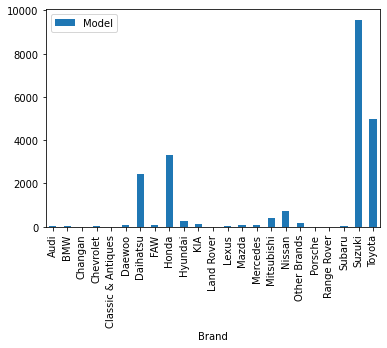

In [5]:
cars_df.groupby(['Brand']).count()[['Model']].plot.bar()

Most of the data is on suzuki honda and toyota, so we could try to build a model based off of those first 

In [6]:
pop_brands = ['Honda', 'Suzuki', 'Toyota']
filt = cars_df['Brand'].isin(pop_brands)
data = cars_df[filt]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18078 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             18078 non-null  object 
 1   Condition         18078 non-null  object 
 2   Fuel              17836 non-null  object 
 3   KMs Driven        17971 non-null  float64
 4   Model             17834 non-null  object 
 5   Price             18078 non-null  int64  
 6   Registered City   16287 non-null  object 
 7   Transaction Type  17836 non-null  object 
 8   Year              17973 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [8]:
missing_data = data.isnull()

In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Brand
False    18078
Name: Brand, dtype: int64

Condition
False    18078
Name: Condition, dtype: int64

Fuel
False    17836
True       242
Name: Fuel, dtype: int64

KMs Driven
False    17971
True       107
Name: KMs Driven, dtype: int64

Model
False    17834
True       244
Name: Model, dtype: int64

Price
False    18078
Name: Price, dtype: int64

Registered City
False    16287
True      1791
Name: Registered City, dtype: int64

Transaction Type
False    17836
True       242
Name: Transaction Type, dtype: int64

Year
False    17973
True       105
Name: Year, dtype: int64



In [10]:
data.drop(columns='Registered City', inplace=True)

/Users/omeraziz/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
cars = data.dropna()

In [12]:
cars.describe(include='all')

,Brand,Condition,Fuel,KMs Driven,Model,Price,Transaction Type,Year
count,17834,17834,17834,1.783400e+04,17834,1.783400e+04,17834,17834.000000
unique,3,2,5,NaN,152,NaN,2,NaN
top,Suzuki,Used,Petrol,NaN,Cultus VXR,NaN,Cash,NaN
freq,9564,14509,11123,NaN,1775,NaN,17093,NaN
mean,NaN,NaN,NaN,1.208586e+05,NaN,9.721032e+05,NaN,2006.373893
std,NaN,NaN,NaN,5.550057e+05,NaN,1.736057e+06,NaN,8.886762
min,NaN,NaN,NaN,1.000000e+00,NaN,5.000000e+04,NaN,1915.000000
25%,NaN,NaN,NaN,1.850000e+04,NaN,4.000000e+05,NaN,2003.000000
50%,NaN,NaN,NaN,6.700000e+04,NaN,6.750000e+05,NaN,2008.000000
75%,NaN,NaN,NaN,1.000000e+05,NaN,1.200000e+06,NaN,2013.000000


In [13]:
cars.groupby(['Brand']).nunique()['Model']

Brand
Honda     38
Suzuki    42
Toyota    74
Name: Model, dtype: int64

In [17]:
print(len(cars) - len(cars.drop_duplicates()), 'duplicates')

1696 duplicates


In [20]:
cars.drop_duplicates(inplace=True)

<ipython-input-20-e8294dd447f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.drop_duplicates(inplace=True)


In [24]:
cars.drop(columns='Transaction Type', inplace=True)

/Users/omeraziz/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
cars

,Brand,Condition,Fuel,KMs Driven,Model,Price,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,2013.0
...,...,...,...,...,...,...,...
24965,Toyota,Used,CNG,100000.0,Corolla XE,520000,1994.0
24966,Toyota,Used,Petrol,76190.0,Avanza,1175000,2011.0
24968,Toyota,Used,CNG,200000.0,Corolla XE,1070000,2001.0
24971,Suzuki,Used,Petrol,1.0,Alto,470000,2003.0


In [54]:
X = cars.drop(columns='Price')
y = cars.Price

In [88]:
cat_variables = ['Brand', 'Condition', 'Fuel']
num_features = ['KMs Driven', 'Year']

In [89]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, FunctionTransformer, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [90]:
num_transformer = Pipeline([
    ('scaler', RobustScaler())
])

# Categorical
cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='error', sparse=False))
])


preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, num_features),
    ('cat_transformer', cat_transformer, cat_variables)
])
preprocessor

ColumnTransformer(transformers=[('num_transformer',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['KMs Driven', 'Year']),
                                ('cat_transformer',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 ['Brand', 'Condition', 'Fuel'])])

In [91]:
pd.DataFrame(preprocessor.fit_transform(X)).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [92]:
X

,Brand,Condition,Fuel,KMs Driven,Model,Year
0,Toyota,Used,Diesel,1.0,Prado,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,2013.0
...,...,...,...,...,...,...
24965,Toyota,Used,CNG,100000.0,Corolla XE,1994.0
24966,Toyota,Used,Petrol,76190.0,Avanza,2011.0
24968,Toyota,Used,CNG,200000.0,Corolla XE,2001.0
24971,Suzuki,Used,Petrol,1.0,Alto,2003.0


In [93]:
pipe_baseline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge_model', LinearRegression())
])
pipe_baseline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['KMs Driven', 'Year']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['Brand', 'Condition',
                                                   'Fuel'])])),
                ('ridge_model', LinearRegression())])

In [127]:
cross_val_score(pipe_baseline, X, y, cv=2, verbose=2, scoring='r2', n_jobs=-1).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.2s finished


0.19729845852166938

In [95]:
X

,Brand,Condition,Fuel,KMs Driven,Model,Year
0,Toyota,Used,Diesel,1.0,Prado,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,2013.0
...,...,...,...,...,...,...
24965,Toyota,Used,CNG,100000.0,Corolla XE,1994.0
24966,Toyota,Used,Petrol,76190.0,Avanza,2011.0
24968,Toyota,Used,CNG,200000.0,Corolla XE,2001.0
24971,Suzuki,Used,Petrol,1.0,Alto,2003.0


In [96]:
X.isnull().sum()

Brand         0
Condition     0
Fuel          0
KMs Driven    0
Model         0
Year          0
dtype: int64

In [98]:
X

,Brand,Condition,Fuel,KMs Driven,Model,Year
0,Toyota,Used,Diesel,1.0,Prado,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,2013.0
...,...,...,...,...,...,...
24965,Toyota,Used,CNG,100000.0,Corolla XE,1994.0
24966,Toyota,Used,Petrol,76190.0,Avanza,2011.0
24968,Toyota,Used,CNG,200000.0,Corolla XE,2001.0
24971,Suzuki,Used,Petrol,1.0,Alto,2003.0


In [124]:
Test = [['Honda', 'Used', 'Petrol', 84000.0, 'Prado', 2013.0]]

In [125]:
test = pd.DataFrame(Test, columns=X.columns)

In [126]:
pipe_baseline.predict(test)

array([1313226.80821386])

In [123]:
y

0        2100000
1         380000
2         340000
3         535000
4        1430000
          ...   
24965     520000
24966    1175000
24968    1070000
24971     470000
24972    2050000
Name: Price, Length: 16138, dtype: int64